2.1 Corpus Sentiments 
---
This code is used to analyze the corpus made in section 1, with the premise of identifying each song through the delimiter called "===SONG===" and separating them accordingly. This will allow the user to find the weights of each song as it appears in the corpus, letting the user identify the positive and negative songs based on the graph below. 

When asked, input your filename for the corpus you want analyzed

[1] - Imports  
[2] - Read File (Optional)  
[3] - Validate Data (Optional)  
[4] - Process  

In [132]:
# Import Block--------------------------------------------
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # type: ignore
#Import matplotlib to graph values generated from corpus sentiments
import matplotlib.pyplot as plt # type: ignore
# Used for testing
from nltk.sentiment.vader import SentimentIntensityAnalyzer # type: ignore

from textblob import TextBlob # type: ignore
# -----------------------------------------------------
# My usual preferences
plt.rcParams['figure.dpi'] = 1000
plt.rcParams["figure.figsize"] = (10,5)

# This is added due to the amount of corpuses that may be created
filename = input("Enter your filename: ") + ".txt"

In [92]:
# Function that reads through corpus and assigns weights to each sentence. 
def read_file(file):
    sentences = []
# Strip through the sentences of the corpus, and append each to the sentence
    with open(file,mode ='r',encoding ="utf-8") as file:
        for line in file:
            if line := line.strip():
                sentences.append(line)
    return sentences
# Sentences will consist of the sentences of the read file at different indices

In [ ]:
# Test Block -------------------------------------------------------------------
# This block is used to show that: a. Code is functioning b. Scores are accurate 
sentences = read_file(filename)
#Function to analyze the sentences
analyzer = SentimentIntensityAnalyzer()
# Allows user to compare sentiment polarity to find values above
lower = input("Enter lower bounds: ")
upper = input("Enter upper bounds: ")
# Demonstrates code size of first 30 lines of corpus
for sentence in sentences[0:30]:
    vs = analyzer.polarity_scores(sentence)
    # If the value is between the bounds, print the value
    if(float(lower) <= vs["compound"] <= float(upper) ):
        print("{:-<65} {}".format(sentence,str(vs["compound"])))


In [133]:
# Method that takes the song contents, the counter and assigns 
# x to song number and y to song polarity. Run after
def process_song(song_lines, song_number, x_values, y_values, song_name):
    song_text = ' '.join(song_lines)
    blob = TextBlob(song_text)
    song_polarity = blob.sentiment.polarity
    print(f"Name: {song_name} | Polarity: {song_polarity:.4f}")
    print(f"Number: {song_number} | Text: {song_text[:50]}...")  # Print the first 50 characters of the song
    x_values.append(song_name)
    y_values.append(song_polarity)

The block below is meant to graph the corpus previously selected by the user. This will create a graph based on the song names and their respective polarity score. Section 3 will highlight the use of scoring these and show how they can be manipulated.

The graph's colors may be changed accordingly, and were set as such as a tribute to MFDoom :)

Processing Song 1-----------------------------------------------------------------
Name: 520102 | Polarity: 0.0304
Number: 1 | Text: 520102.html [Dr. Doom:] My servants began to forge...
Processing Song 2-----------------------------------------------------------------
Name: absolutely | Polarity: 0.1164
Number: 2 | Text: absolutely.html Absolute power corrupts absolutely...
Processing Song 3-----------------------------------------------------------------
Name: accordion | Polarity: 0.1181
Number: 3 | Text: accordion.html Living off borrowed time, the clock...
Processing Song 4-----------------------------------------------------------------
Name: adeadmouse | Polarity: -0.1316
Number: 4 | Text: adeadmouse.html Even then I had the uneasy feeling...
Processing Song 5-----------------------------------------------------------------
Name: allcaps | Polarity: -0.0853
Number: 5 | Text: allcaps.html So nasty that it's probably somewhat ...
Processing Song 6----------------------------------

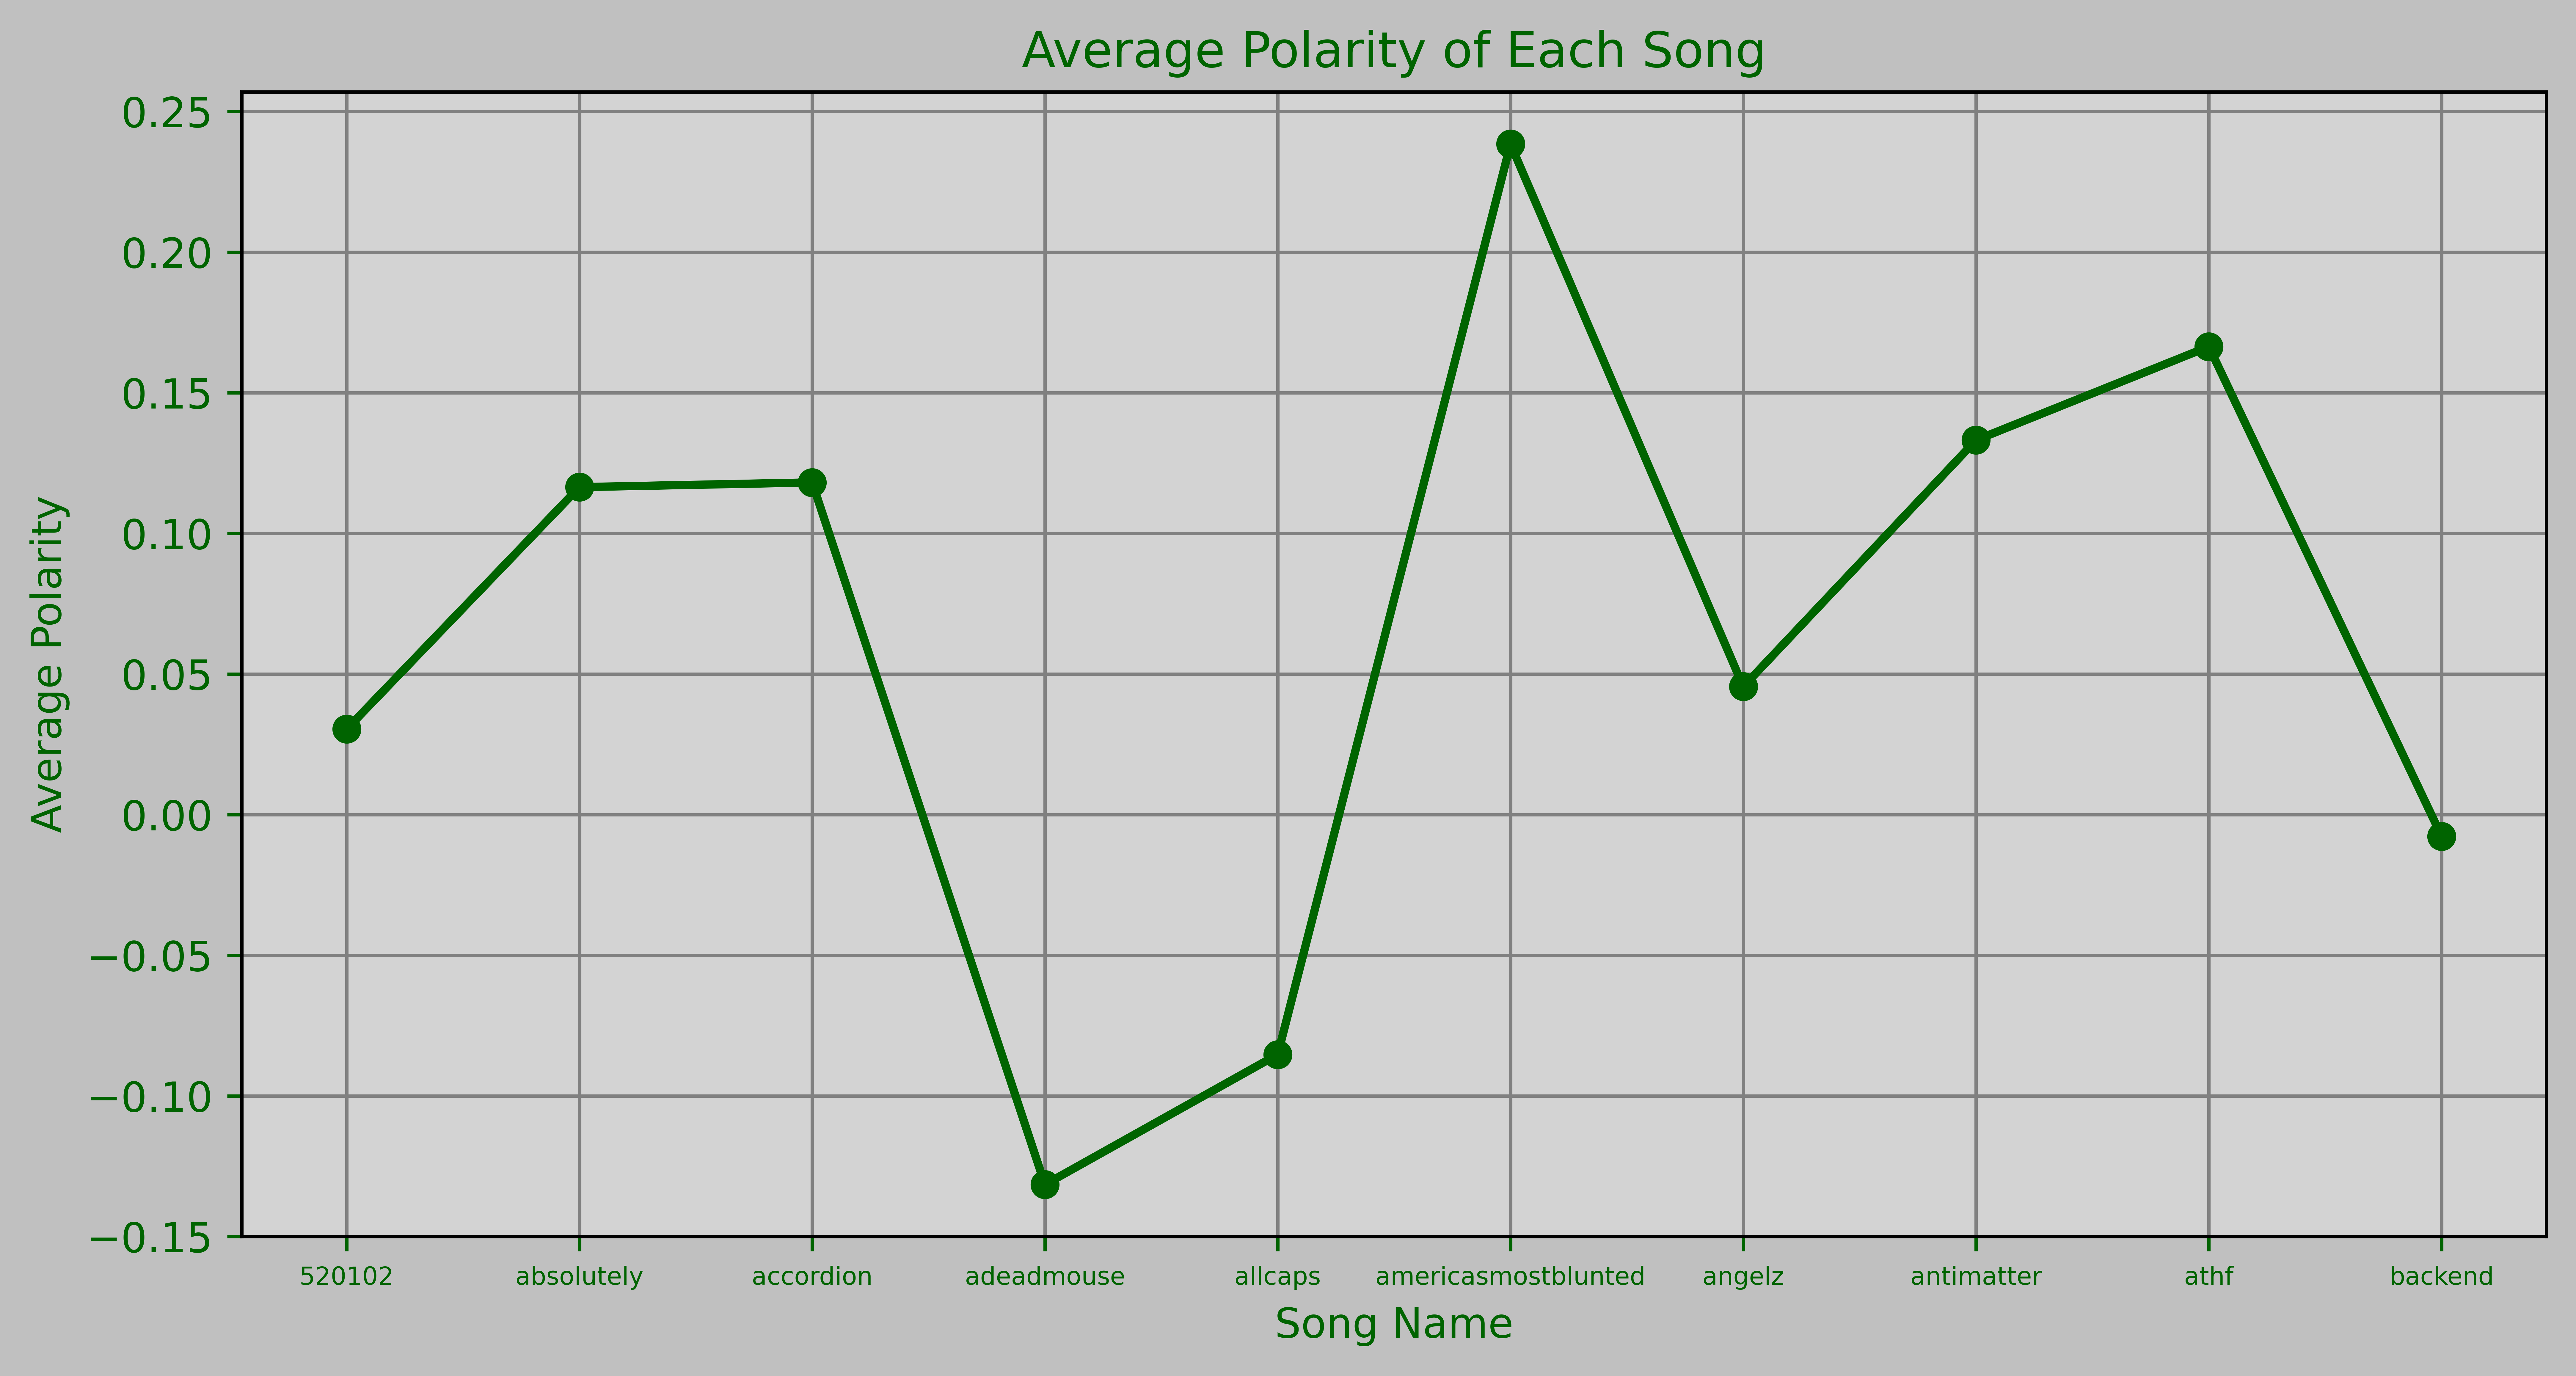

In [131]:
delimiter = "===SONG==="

def calculate_polarity_for_each_song(filename, delimiter):
    with open(filename, 'r', encoding='utf-8') as file:
        # Set the variables for the plot
        song_lines = []
        # Songs will be labeled as a number with the song name listed next to the output
        song_number = 0
        x_values = []
        y_values = []
        # Read file and check if the value is a delimiter. If not, append the line to the song
        # If a delimiter, get the song name, and process the song up to the point of the delimiter
        # Store this value as a data point in the graph below. Reinitialize the list for a new song
        for line in file:
            line = line.strip()
            if line == delimiter:
                if song_lines:
                    song_number += 1
                    song_name = song_lines[0].split('.html')[0]
                    print(f"Processing Song {song_number}{'-'* 65}")
                    process_song(song_lines, song_number, x_values, y_values, song_name)
                    song_lines = []
            else:
                song_lines.append(line)
        # Plot the current graph-----------------------------
        # Colors chosen are for MFDoom :)--------------------
        plt.figure(facecolor = 'silver')
        plt.plot(x_values, y_values, marker='o', color = 'darkgreen', linewidth = 2)
        plt.title('Average Polarity of Each Song', color = 'darkgreen')
        plt.xlabel('Song Name', color = 'darkgreen')
        plt.ylabel('Average Polarity', color = 'darkgreen')
        plt.grid(True)
        plt.xticks(fontsize=6)
        plt.gca().set_facecolor('#D3D3D3')  # Darker background color
        plt.tick_params(axis='x', colors='darkgreen')
        plt.tick_params(axis='y', colors='darkgreen')
        plt.grid(color='gray')  # Grid lines color
        plt.show()
calculate_polarity_for_each_song(corpus_file, delimiter)
